# Triangulation

In [1]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# First create the x and y coordinates of the points.
configs = {
    key: value
    for key, value in (("n_angles", 36), ("n_radii", 8), ("min_radius", 0.25))
}

radii = np.linspace(configs["min_radius"], 0.95, configs["n_radii"])

angles = np.linspace(0, 2 * np.pi, configs["n_angles"], endpoint=False)
angles = np.repeat(angles[..., np.newaxis], configs["n_radii"], axis=1)
angles[:, 1::2] += np.pi / configs["n_angles"]

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(
    np.hypot(
        x[triang.triangles].mean(axis=1), y[triang.triangles].mean(axis=1)
    )
    < configs["min_radius"]
)

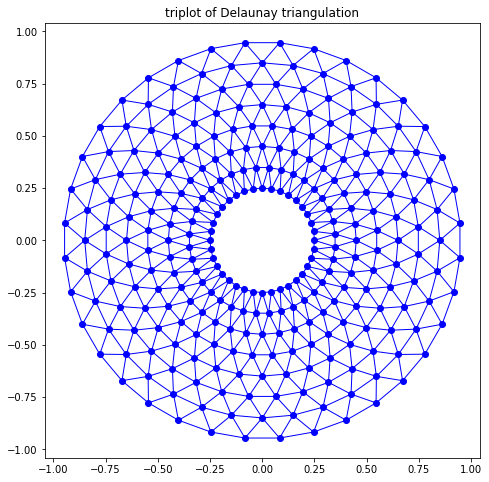

In [3]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_aspect("equal")
ax1.triplot(triang, "bo-", lw=1)
ax1.set_title("triplot of Delaunay triangulation");